# Bitcoin Prediction 

### Importing libraries and preprocessing

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
import tensorflow
print(tensorflow.__version__)

2.4.1


In [323]:
training = pd.read_csv("bitcoin_price_Training - Training.csv",thousands=',')
testing =  pd.read_csv("bitcoin_price_1week_Test - Test.csv",thousands=',')

In [324]:
training.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000",45535800000
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000",44890700000
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000",46246700000
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000",44144400000
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000",41816500000


In [325]:
testing.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Aug 07, 2017",3212.78,3397.68,3180.89,3378.94,1482280000,52987300000
1,"Aug 06, 2017",3257.61,3293.29,3155.60,3213.94,1105030000,53720900000
2,"Aug 05, 2017",2897.63,3290.01,2874.83,3252.91,1945700000,47778200000
3,"Aug 04, 2017",2806.93,2899.33,2743.72,2895.89,1002120000,46276200000
4,"Aug 03, 2017",2709.56,2813.31,2685.14,2804.73,804797000,44666400000


In [326]:
del training['Date']

In [327]:
training.head()

,Open,High,Low,Close,Volume,Market Cap
0,2763.24,2889.62,2720.61,2875.34,"860,575,000",45535800000
1,2724.39,2758.53,2644.85,2757.18,"705,943,000",44890700000
2,2807.02,2808.76,2692.80,2726.45,"803,746,000",46246700000
3,2679.73,2897.45,2679.73,2809.01,"1,380,100,000",44144400000
4,2538.71,2693.32,2529.34,2671.78,"789,104,000",41816500000


In [328]:
del testing['Date']

In [329]:
testing.head()

,Open,High,Low,Close,Volume,Market Cap
0,3212.78,3397.68,3180.89,3378.94,1482280000,52987300000
1,3257.61,3293.29,3155.60,3213.94,1105030000,53720900000
2,2897.63,3290.01,2874.83,3252.91,1945700000,47778200000
3,2806.93,2899.33,2743.72,2895.89,1002120000,46276200000
4,2709.56,2813.31,2685.14,2804.73,804797000,44666400000


In [330]:
train = training[::-1]
test = testing[::-1]

In [331]:
train.head()

,Open,High,Low,Close,Volume,Market Cap
1555,135.30,135.98,132.10,134.21,-,1500520000
1554,134.44,147.49,134.00,144.54,-,1491160000
1553,144.00,146.93,134.05,139.00,-,1597780000
1552,139.00,139.89,107.72,116.99,-,1542820000
1551,116.38,125.60,92.28,105.21,-,1292190000


In [332]:
test.head()

,Open,High,Low,Close,Volume,Market Cap
6,2871.30,2921.35,2685.61,2718.26,1324670000,47321800000
5,2727.13,2762.53,2668.59,2710.67,1094950000,44950800000
4,2709.56,2813.31,2685.14,2804.73,804797000,44666400000
3,2806.93,2899.33,2743.72,2895.89,1002120000,46276200000
2,2897.63,3290.01,2874.83,3252.91,1945700000,47778200000


In [333]:
training.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [334]:
testing.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [335]:
training.shape

(1556, 6)

In [336]:
testing.shape

(7, 6)

In [337]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1556 non-null   float64
 1   High        1556 non-null   float64
 2   Low         1556 non-null   float64
 3   Close       1556 non-null   float64
 4   Volume      1556 non-null   object 
 5   Market Cap  1556 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 73.1+ KB


In [338]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        7 non-null      float64
 1   High        7 non-null      float64
 2   Low         7 non-null      float64
 3   Close       7 non-null      float64
 4   Volume      7 non-null      int64  
 5   Market Cap  7 non-null      int64  
dtypes: float64(4), int64(2)
memory usage: 464.0 bytes


In [339]:
training.describe()

,Open,High,Low,Close,Market Cap
count,1556.000000,1556.000000,1556.000000,1556.000000,1.556000e+03
mean,582.625328,597.992847,567.851446,584.239396,8.694353e+09
std,523.137312,542.992855,505.877401,525.904442,8.707288e+09
min,68.500000,74.560000,65.530000,68.430000,7.792550e+08
25%,254.287500,260.327500,248.835000,254.320000,3.598355e+09
50%,438.600000,447.560000,430.570000,438.855000,6.386210e+09
75%,662.437500,674.525000,646.735000,663.402500,9.898830e+09
max,2953.220000,2999.910000,2840.530000,2958.110000,4.839120e+10


In [340]:
testing.describe()

,Open,High,Low,Close,Volume,Market Cap
count,7.000000,7.000000,7.000000,7.000000,7.000000e+00,7.000000e+00
mean,2926.134286,3053.928571,2856.340000,2996.477143,1.251364e+09,4.824309e+10
std,222.327835,263.148120,224.210701,278.478301,3.759925e+08,3.676034e+09
min,2709.560000,2762.530000,2668.590000,2710.670000,8.047970e+08,4.466640e+10
25%,2767.030000,2856.320000,2685.375000,2761.495000,1.048535e+09,4.561350e+10
50%,2871.300000,2921.350000,2743.720000,2895.890000,1.105030e+09,4.732180e+10
75%,3055.205000,3291.650000,3015.215000,3233.425000,1.403475e+09,5.038275e+10
max,3257.610000,3397.680000,3180.890000,3378.940000,1.945700e+09,5.372090e+10


In [341]:
train = train['Close'].values.astype('float32')
test = test['Close'].values.astype('float32')

### Scaling the data

In [342]:
from sklearn.preprocessing import MinMaxScaler
values = training['Market Cap'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

### Spliting data into training and test set

In [343]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1244 312


### Creating Dataset

In [344]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [345]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Reshaping the dataset

In [346]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### LSTM

In [347]:
epochs = 100
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(units=5,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=9))
model.compile(optimizer='adam',loss='mse',metrics= ['accuracy'])
history=model.fit(trainX,trainY, batch_size = 32, epochs = epochs,validation_data=(testX, testY))
model.summary

Epoch 1/100
39/39 [==============================] - 8s 53ms/step - loss: 0.0662 - accuracy: 0.0000e+00 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 2/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 0.0011 - val_loss: 0.0190 - val_accuracy: 0.0000e+00
Epoch 3/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.0000e+00 - val_loss: 0.0167 - val_accuracy: 0.0000e+00
Epoch 4/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0284 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0032
Epoch 5/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0128 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0032
Epoch 6/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0032
Epoch 7/100
39/39 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.0000e+00 - val_loss: 0.0018

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f0448ddf090>>

### Visualization

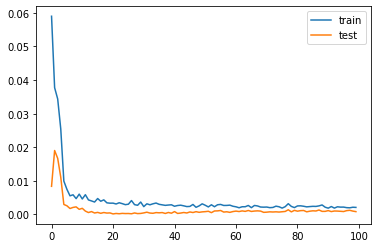

In [348]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

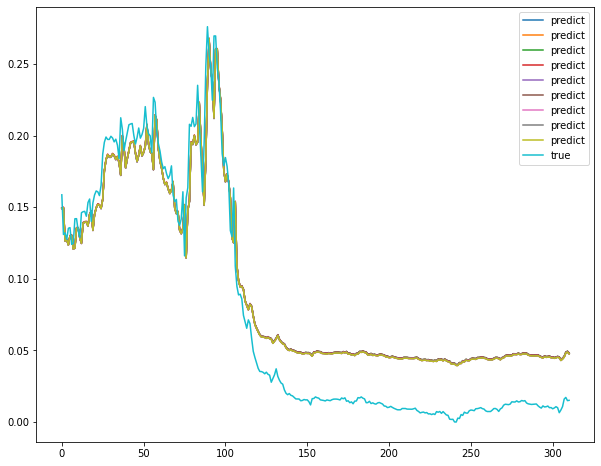

In [349]:
yhat = model.predict(testX)
plt.figure(figsize=(10,8))
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()

In [350]:
yhat.shape

(311, 9)

In [351]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [352]:
yhat_inverse.shape

(2799, 1)

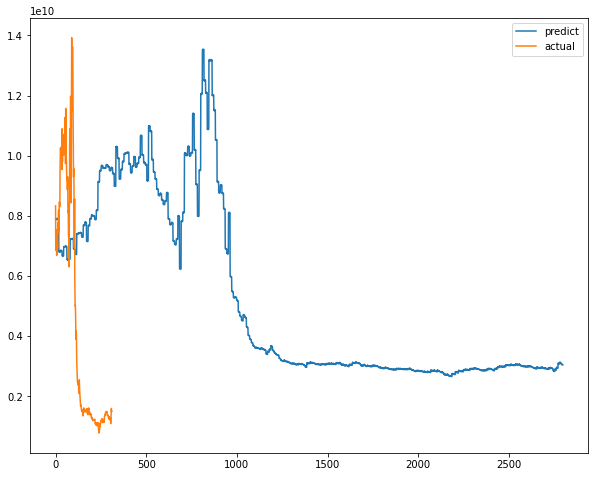

In [353]:
plt.figure(figsize=(10,8))
plt.plot(yhat_inverse, label='predict')
plt.plot(testY_inverse, label='actual')
plt.legend()
plt.show()

In [354]:
predictDates = training.tail(len(testX)).index
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [355]:
import plotly.graph_objs as go
import plotly.offline as py
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])